<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер два! </center>


Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри второй домашки. __Краткий брифинг:__ 

* _НУ чё? Упоролись первой домашкой?_ Пришло время упороться второй раз! 
* __Дедлайн: 02.06.19__
* Вторая домашка затрагивает сходимости случайных величин, свойства оценок и доверительные интервалы
* В домашке нет кита, мне он не понравился и я его удалил, остались одни рыбёшки. 
* __Важно:__ задачек много, я отсортировал их в порядке важности. Те задачки, что на самом верху - на свойства оценок и доверительные интервалы, нужно решить в первую очередь. Всё, что связано со сходимостями - во вторую. Если у вас мало времени, лучше посвятите его доверительным интервалам. 
* Часть задач снова нужно решить руками. 
* Ваша команда пытается решить как можно больше задач и присылает их мне.
* Если очень хочется, можем устроить после всех дедлайнов серию из пар с разбором домашек. 
* Свои решения постараюсь выложить после дедлайна.
* __WARNING:__ [на страничке курса](https://fulyankin.github.io/r_probability/) есть решение домашек прошлого года. Ими можно пользоваться. Правда, если вы что-то там нашли, нужно не просто перебить код, а понять его и осознать. 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста, не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. Заодно попрактикуетесь в формулах для LaTeX. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# 1. Рыбёшки

### [2] Задачка 1

Начинающий каратист Вася тренируется бить кирпичи ударом ладони. Каждый день он бьёт ладонью по кирпичу до тех пор, пока тот не расколется от одного удара. Предположим, что вероятность разбить кирпич с одного удара равна $p$ и неизменна во времени. Величины $X_1, X_2, \ldots , X_n$ — количество ударов, которое потребовались Васе в соответствующий день. Заполните для неизвестного параметра $p$ табличку: 

|  $\hat p  $       |несмещённая          | смещённая             |
|-------------------|---------------------|-----------------------|
|__состоятельная__  |       $\mbox{ }$    |      $\mbox{ }$       |
|__несостоятельная__|       $\mbox{ }$    |      $\mbox{ }$       |

Покажите для всех оценок из таблички, что вы поместили их в правильные места. Для каждой ячейки придумайте по два примера оценок. 

__Решение:__ 

Я мог бы притвориться, что задумал это всё специально. Но на самом деле я фиганул распределение из головы не подумав. А вы не подумав, попытались решить с ходу эту задачку. На самом деле она сложная. Жаль, что вы этого и не заметили и глупостей понаписали :( 

Геометрическое распределение можно определить двумя способами. Либо включать успех в счётчик, либо нет. Идеологически от этого ничего не меняется. Выпишем характеристики распределения. 

\begin{equation*}
\begin{aligned}
&E(X) = \frac{1}{p} \\
&Var(X) = \frac{1-p}{p^2} \\
&E(X^2) = Var(X) + E(X)^2 = \frac{2 - p}{p^2}  
\end{aligned}
\end{equation*}

Из уравнения для первого момента получаем оценку $\hat p = \frac{1}{\bar x}$. Все вы нашли её. Однако, кто вам сказал, что это несмещённая оценка? Все вы рассуждали, что 

$$E(\bar x) = \frac{1}{p} \Rightarrow E \left( \frac{1}{\bar x} \right) = \frac{1}{E(\bar x)} = p$$

__Это неверная логика!__ У математического ожидания нет свойства $E \left( \frac{1}{X} \right) = \frac{1}{E(X)}$. Можно по-честному посчитать математическое ожидание дроби и убедиться, что оценка __будет смещена.__ 

Перед тем, как на эту дробь бросаться, неплохо было бы понять как распределена сумма $X_1 + \ldots + X_n$. Мы с вами уже сталкивались с этой суммой на паре. Правда в немного замаскированном виде. Помните задачку про киндеры и игуану?  Там мы покупали киндеры, пока не попадалась новая игрушка. То есть как раз смотрели на сумму геометрических распределений с разными вероятностями $p_i$. Такая штука, где рассматривается сумма геометрических распределений, называется coupon collection problem.  Вот [неплохая презенташка про это.](https://pdfs.semanticscholar.org/2c7c/6b2d0a92e890c11a802ecce35dd4935b4fc8.pdf)

Тут ситуация попроще, и вероятность везде одинаковая. Если аккуратно применить формулу свёртки $n$ раз, можно получить, что сумма имеет [негативное биномиальное](https://en.wikipedia.org/wiki/Negative_binomial_distribution) распределение. [Вот тут расписан первый шаг](https://math.stackexchange.com/questions/1435545/probability-mass-function-of-sum-of-two-independent-geometric-random-variables) для суммы из двух величин. Дальше надо повторить $n$ раз то же самое и накопить коэффициент $C_{k+r-1}^k$. 

Теперь наконец-то можно найти математическое ожидание $\frac{1}{\bar x}$. Дело иметь придётся с нетривиальной суммой и свойствами биномиальных коэффициентов. В итоге, [смещение](https://en.wikipedia.org/wiki/Geometric_distribution) окажется равно $\frac{p \cdot (1-p)}{n}$. И дальше уже можно попробовать скоректировать оценку. 

---------------------------------

Теперь об оставшихся клетках. __Ребята, блин!__ 

* Если у вас была оценка $e$ и вы сделали $e + \frac{1}{n}$, у вас повреждена несмещённость, но при этом всё нормально с состоятельностью. 
* Если у вас была оценка $e$ и вы сделали $e + 4$, то оба свойства перестают работать. Математическое ожидание съезжает на $4$, и оценка сходится к чему-то на $4$ больше истины. 
* Если вы берёте в качестве оценки $X_{28}$, то никакой состоятельности точно не будет. Потому что это одно наблюдение. Вы чего так на ерунде косячите :( 

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ код тут не нужен

### [2]  Задачка 2

Давайте уточним правило трёх сигм. 

__Утверждение:__ $99.7\%$ вероятностной массы случайной величины $X \sim N(\mu,\sigma^2)$ лежит в интервале $\mu \pm c \cdot \sigma$. Чему равно значение константы $c$? А если речь про 80\%? 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ я изгоняю тебя Саруман, как яд изгоняют из раны

qnorm(1 - (1 - 0.997)/2)
qnorm(1 - 0.2/2)

[1] 2.967738

[1] 1.281552

### [10] Задачка 3

Для $61$ большого города в Англии и Уэльсе известны средняя годовая смертность на $100000$ населения (по данным за 1958-1964 гг.) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные. Данные лежат [в табличке water.txt.](https://yadi.sk/i/l7SqdKFm-JBO9g) 

В первом пункте этой задачки нужно построить асимптотический доверительный интервал для средней годовой смертности в больших городах. Для начала выведете его руками из ЦПТ. По аналогии с тем, как мы сделали это для $\lambda$ из модели Пуассона. После постройте $95\%$ доверительный интервал для средней годовой смертности в больших городах.

__Решение:__ 

Выведение в лекциях ищите!

In [4]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/water.txt', sep='\t')
head(df)

location,town,mortality,hardness
South,Bath,1247,105
North,Birkenhead,1668,17
South,Birmingham,1466,5
North,Blackburn,1800,14
North,Blackpool,1609,18
North,Bolton,1558,10


In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  Peace is a lie, there is only passion.
asy_norm_conf = function(x, alpha){

    z_alpha = qnorm(1 - alpha/2)
    
    n = length(x)
    mu_hat = mean(x)
    sd = sd(x)

    left = mu_hat - z_alpha * sd/sqrt(n)
    right = mu_hat + z_alpha * sd/sqrt(n)

    cat('Среднее с вероятностью 95% лежит между',left, 'и',right, '\n')
    cat('Длина интервала:', right-left)   
    }

asy_norm_conf(df$mortality, 0.05)

Среднее с вероятностью 95% лежит между 1477.053 и 1571.243 
Длина интервала: 94.19007

Постройте $95\%$ точный доверительный интервал для средней годовой смертности. Помните, что для этого мы используем распределение Стьюдента? 

* Воспроизведите формулы для выведения этого интервала. 
* Какой теоремой мы пользуемся при конструировании распределения для среднего? 
* Правда ли, что при этом мы предполагаем, что годовая смертность имеет нормальное распределение? 
* Может ли это оказаться неправдой?
* Постройте интервал в R. 
* Он получился длиннее асимптотического? Почему? 

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════   Through passion, I gain strength.

alpha = 0.05

x = df$mortality

n = length(x)
t_alpha = qt(1 - alpha/2, df=n-1)

mu_hat = mean(x)
sd = sd(x)

left = mu_hat - t_alpha * sd/sqrt(n)
right = mu_hat + t_alpha * sd/sqrt(n)

cat('Среднее с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left)

# Интервал вышел длиннее асимптотического, так как у распределения Стьюдента хвосты 
# тяжелее, чем у нормального, и это позволяет за счёт коррекции на оценку s^2 
# получить точный интервал (при условии что выборка нормальная)

Среднее с вероятностью 95% лежит между 1476.083 и 1572.212 
Длина интервала: 96.1284

Постройте $95\%$ асимптотический доверительный интервал для средней годовой смертности по всем южным городам.

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════   Through strength, I gain power.
asy_norm_conf(df[df$location == 'South',]$mortality, 0.05)

Среднее с вероятностью 95% лежит между 1322.891 и 1430.724 
Длина интервала: 107.8335

Постройте такой же асимптотический доверительный интервал для средней годовой смертности по всем северным городам.

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════   Through power, I gain victory.
asy_norm_conf(df[df$location == 'North',]$mortality, 0.05)

Среднее с вероятностью 95% лежит между 1588.234 и 1678.966 
Длина интервала: 90.73286

Пересекаются ли доверительный интервалы для средней жёсткости воды в северных и южных городах? Как вы думаете, какой из этого можно сделать вывод? 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  Through victory, my chains are broken.

# Жёсткость воды в регионах разная (но чисто формально лучше проверить гипотезу)
# потому что эта процедура обладает более низкой мощностью, вам предстоит 
# доказать это в четвёртой домашке!

В лекционной тетрадке есть кусочек, где мы выводим формулу для поиска необходимого объёма выборки, чтобы на уровне доверия $1 - \alpha$ оценить долю с фиксированной точностью. Выведите такую же формулу для среднего. При $\sigma = 1$ какой нужен объём выборки, чтобы на уровне доверия $95\%$ оценить среднее с точностью $\pm 0.1$? 


Доверительный интервал имеет вид 

$$
\bar x - z \cdot \frac{s}{\sqrt{n}} \le \mu \le \bar x + z \cdot \frac{s}{\sqrt{n}}
$$

Вычитаем из правой границы левую, получаем 

$$
right - left = 2 \cdot z \cdot \frac{s}{\sqrt{n}}.
$$

Отсюда получаем, что 

$$
n = \frac{4 \cdot z^2 \cdot s^2}{(right - left)^2}
$$


Мы хотим иметь точность $\pm 0.1$, значит, $right - left = 0.2$. Тогда, если дисперсия неизвестна, 

$$
n = 100\cdot t_{1 - \frac{\alpha}{2}}^2 (n-1) \cdot s^2.
$$

Если дисперсия известна, тогда 

$$
n = 100\cdot z_{1 - \frac{\alpha}{2}}^2  \cdot s^2.
$$

Найдем необходимый объем выборки, если $\sigma = 1$

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  The Force shall free me.

sigma = 1
n = 100*(qnorm(1-alpha/2))^2 * sigma^2
n

[1] 384.1459

Выведите на основе ЦПТ и свойств нормального распределения распределение случайной величины $\bar x_1 - \bar x_2$, где $\bar x_1$ - средняя жесткость на севере, а $\bar x_2$ на юге. Постройте для этой разницы исходя из полученного распределения доверительный интервал. Все выведения дублируют то, что мы делали на лекции для долей и пуассона. Если вы не поняли этого, самое время разобраться :) 

Помним, что 

$$
\bar x \sim N(\mu_1, \frac{\sigma^2_1}{n_1}) \\ 
\bar{y} \sim N(\mu_2, \frac{\sigma^2_2}{n_2}) \\ 
\bar{x} - \bar y \sim N(\mu_1 - \mu_2, \frac{\sigma^2_1}{n_1} +  \frac{\sigma^2_2}{n_2} ) \\ 
$$


Тогда Доверительный интервал примет вид 

$$
(\bar{x} - \bar y)  \pm z_{1-\frac{\alpha}{2}}\cdot \sqrt{\frac{\sigma^2_1}{n_1} +  \frac{\sigma^2_2}{n_2}}
$$

Осталось только построить его.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
alpha = 0.05
z_alpha = qnorm(1 - alpha/2)

x = df[df$location == 'South',]$hardness
y = df[df$location == 'North',]$hardness

n1 = length(x)
n2 = length(y)

mu1 = mean(x)
mu2 = mean(y)

var1 = var(x)
var2 = var(y)

left = (mu1 - mu2) - z_alpha * sqrt(var1/n1 + var2/n2)
right = (mu1 - mu2) + z_alpha * sqrt(var1/n1 + var2/n2)

cat('Среднее с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left)   

Среднее с вероятностью 95% лежит между 21.60284 и 57.13562 
Длина интервала: 35.53277

### [10] Задачка 4

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из $50$ исследованных представителей индейцев майя, вариант 13910T был обнаружен у одного. Постройте нормальный $95\%$ доверительный интервал для доли носителей варианта 13910T в популяции майя. Формулу можно не выводить, но раздел про доли в лекции прочитать ещё разок не помешает. 

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ когда вода всемирного потопа
alpha = 0.05
p_hat = 1/50
n = 50

sd_p = sqrt(p_hat*(1-p_hat)/n)

left = p_hat - qnorm(1-alpha/2)*sd_p
right = p_hat + qnorm(1-alpha/2)*sd_p

cat('Среднее с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left)   

Среднее с вероятностью 95% лежит между -0.01880531 и 0.05880531 
Длина интервала: 0.07761061

В условиях предыдущей задачи постройте $95\%$ доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя.

Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от $0$ до $1$? Почему так произошло? В каких ситуациях на практике обычно используют интервал Уилсона? 

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ покинула границы берегов

library('binom') # Можно было оба пункта в одну строчку, но это не так весело :) 
binom.confint(1, 50, conf.level = 0.95, methods = c('asymptotic', 'wilson'))

# Уилсон оказался адекватнее, так как параметр лежит от 0 до 1. Интервал предназначен для ситуаций когда p
# близко к 0 или 1.

method,x,n,mean,lower,upper
asymptotic,1,50,0.02,-0.018805307,0.05880531
wilson,1,50,0.02,0.003539259,0.10495444


Пусть в популяции майя действительно $2\%$ носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm 0.01$ на уровне доверия $95\%$?

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ из пены уходящего потока

sample_len <- function(alpha, len){
    return(ceiling(4*qnorm(1 - alpha/2)^2*p_hat*(1 - p_hat)/len^2))
    }

sample_len(0.05, 0.02)

[1] 753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm 0.01$ на уровне доверия $95\%$, от неизвестного параметра $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm 0.01$ на уровне доверия $95\%$?

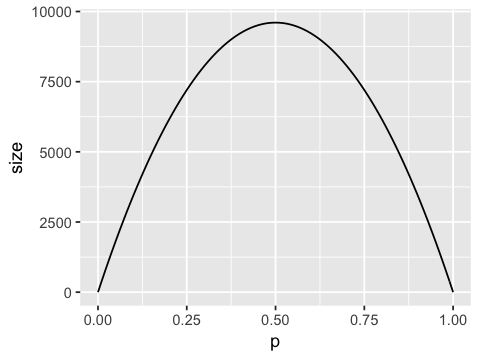

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ на сушу тихо выбралась любовь

sample_len <- function(p_hat){
    alpha = 0.05
    len = 0.02
    return(ceiling(4*qnorm(1 - alpha/2)^2*p_hat*(1 - p_hat)/len^2))
    }

p = seq(0,1,0.01)
size = sample_len(p)
qplot(p, size, geom='line')

In [16]:
max(size)

[1] 9604

### [10] Задачка 5

Снова поговорим про недвижимость. На лекции мы уже смотрели на неё. 

В [табличке](https://yadi.sk/i/hDxMJ0fw3VSDmu) лежит информация о стоимости квартир в Москве и о основных параметрах этих квартир. В переменной `price` записаны цены. В `code` записано число от 1 до 8, при помощи которого мы группируем наблюдения по подвыборкам:

```
            1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
            метрополитена
            2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
            3. Северо-запад, вокруг Замоскворецкой линии метрополитена
            4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
            5. Юго-восток, вокруг Люблинской линии метрополитена
            6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
            7. Восток, вокруг Калиниской линии метрополитена
            8. Восток, вокруг Арбатско-Покровской линии метрополитена
```

В переменной `brick` лежит информация о том монолитный это дом (`brick = 1`) или панельный.

In [17]:
library('dplyr')
library('ggplot2')
library('rio')

df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/flat.csv')
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3
6,137,76,50,9,11.0,7,1,1,1,8


На паре мы немного поисследовали цены в разных районах и построили для каждого района среднюю оценку стоимости квартиры. Где-то она оказалась больше, где-то меньше. Будем предполагать, что стоимость квартир имеет нормальное распределение (в следующей домашке мы выясним, что это не так). 

__[а]__  Постройте по всем районам точные $95\%$ доверительные интервалы для разницы в средней стоимости квартир в монолитных и панельных домах. В каких районах ноль не попадает в доверительный интервал? Что это означает? Постройте красивую картинку по аналогии с лекционной. Раскрасьте все интервалы, где ноль не попал в них в синий цвет, где попал в красный. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ бум и ты умеешь решать задачи
alpha = 0.05

# Подсчитали число объектов первого типа и второго
dn = df %>% filter(brick==0) %>% group_by(code) %>% summarise(n1 = n(), mu1 = mean(price), s1 = sd(price))
dm = df %>% filter(brick==1) %>% group_by(code) %>% count(n2 = n(), mu2 = mean(price), s2 = sd(price))

# объединили таблички в одну
df_stat = left_join(dn, dm, by= 'code')
df_stat

code,n1,mu1,s1,n2,mu2,s2,n
1,180,123.0000,39.17672,92,156.7391,59.59495,92
2,186,105.9516,20.72139,29,138.3103,53.70628,29
3,169,134.7337,64.17104,176,161.2216,74.10558,176
4,140,135.9429,60.03881,69,174.5652,90.62487,69
5,290,115.0276,27.29892,46,120.5217,50.76996,46
6,193,107.2850,31.14042,64,118.0469,37.08310,64
7,152,108.4868,22.95460,74,126.0270,47.34860,74
8,71,126.2535,39.34489,109,143.5780,52.89828,109


In [19]:
df_stat = df_stat %>% mutate(t_alpha = qt(df = n1 + n2 - 2, alpha))
df_stat 

code,n1,mu1,s1,n2,mu2,s2,n,t_alpha
1,180,123.0000,39.17672,92,156.7391,59.59495,92,-1.650517
2,186,105.9516,20.72139,29,138.3103,53.70628,29,-1.652039
3,169,134.7337,64.17104,176,161.2216,74.10558,176,-1.649308
4,140,135.9429,60.03881,69,174.5652,90.62487,69,-1.652248
5,290,115.0276,27.29892,46,120.5217,50.76996,46,-1.649429
6,193,107.2850,31.14042,64,118.0469,37.08310,64,-1.650851
7,152,108.4868,22.95460,74,126.0270,47.34860,74,-1.651685
8,71,126.2535,39.34489,109,143.5780,52.89828,109,-1.653459


In [20]:
df_stat = df_stat %>% mutate(left_mu = (mu2 - mu1) + t_alpha* sqrt(s1^2/n1 + s2^2/n2), 
                   right_mu = (mu2 - mu1) - t_alpha* sqrt(s1^2/n1 + s2^2/n2))
df_stat                 

code,n1,mu1,s1,n2,mu2,s2,n,t_alpha,left_mu,right_mu
1,180,123.0000,39.17672,92,156.7391,59.59495,92,-1.650517,22.408043,45.07022
2,186,105.9516,20.72139,29,138.3103,53.70628,29,-1.652039,15.692835,49.02463
3,169,134.7337,64.17104,176,161.2216,74.10558,176,-1.649308,14.193171,38.78256
4,140,135.9429,60.03881,69,174.5652,90.62487,69,-1.652248,18.742127,58.50259
5,290,115.0276,27.29892,46,120.5217,50.76996,46,-1.649429,-7.132790,18.12110
6,193,107.2850,31.14042,64,118.0469,37.08310,64,-1.650851,2.261812,19.26199
7,152,108.4868,22.95460,74,126.0270,47.34860,74,-1.651685,7.943010,27.13736
8,71,126.2535,39.34489,109,143.5780,52.89828,109,-1.653459,5.931789,28.71713


In [21]:
df_stat = df_stat %>% mutate(is_in = ifelse(left_mu < 0 & right_mu > 0, "yes", "no"))  
df_stat

code,n1,mu1,s1,n2,mu2,s2,n,t_alpha,left_mu,right_mu,is_in
1,180,123.0000,39.17672,92,156.7391,59.59495,92,-1.650517,22.408043,45.07022,no
2,186,105.9516,20.72139,29,138.3103,53.70628,29,-1.652039,15.692835,49.02463,no
3,169,134.7337,64.17104,176,161.2216,74.10558,176,-1.649308,14.193171,38.78256,no
4,140,135.9429,60.03881,69,174.5652,90.62487,69,-1.652248,18.742127,58.50259,no
5,290,115.0276,27.29892,46,120.5217,50.76996,46,-1.649429,-7.132790,18.12110,yes
6,193,107.2850,31.14042,64,118.0469,37.08310,64,-1.650851,2.261812,19.26199,no
7,152,108.4868,22.95460,74,126.0270,47.34860,74,-1.651685,7.943010,27.13736,no
8,71,126.2535,39.34489,109,143.5780,52.89828,109,-1.653459,5.931789,28.71713,no


In [22]:
ci_data = data.frame(ci_id = df_stat$code,        # по оси y будем откладывать id района
                     is_in = df_stat$is_in,       # раскраска для интервалов
                     ci = c(df_stat$left_mu, df_stat$right_mu))  # интервалы для оси x 
ci_data %>% head()

ci_id,is_in,ci
1,no,22.408043
2,no,15.692835
3,no,14.193171
4,no,18.742127
5,yes,-7.132790
6,no,2.261812


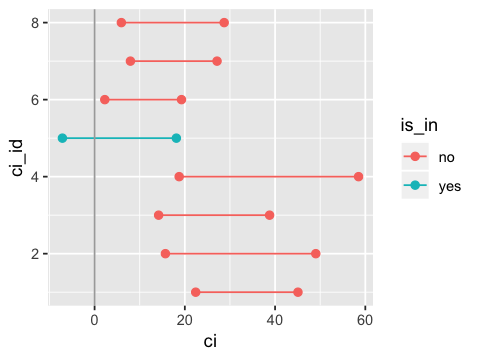

In [23]:
ggplot(data = ci_data, aes(x = ci, y = ci_id, group = ci_id, color = is_in)) + 
    # рисуем в начале и конце интервала точки
    geom_point(size = 2) +
    # соединяем эти точки линией
    geom_line() +
    # прорисовываем на картинке 0 в виде серой черты
    geom_vline(xintercept = 0, color = "darkgray")

__[б]__ Предполагая нормальность распределения цен, постройте $95\%$ доверительный интервал для дисперсии стоимости квартир. Какой теоремой мы пользуемся, чтобы вывести распределение для дисперсии? Математическое ожидание, конечно же неизвестно. 

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ вжух и ты умеешь писать код на R

# Конечно теоремой Фишера! 
round(nrow(df) * var(df$price)/qchisq(c(0.975,0.025),df=nrow(df) - 1),2)

[1] 2534.74 2865.91

__[в]__ Постройте доверительные интервалы для дисперсии по всем районам. В каких районах разброс в ценах самый высокий? Как думаете, почему именно в них? Как высокая дисперсия цен в районе влияет на вас, как на покупателя? 

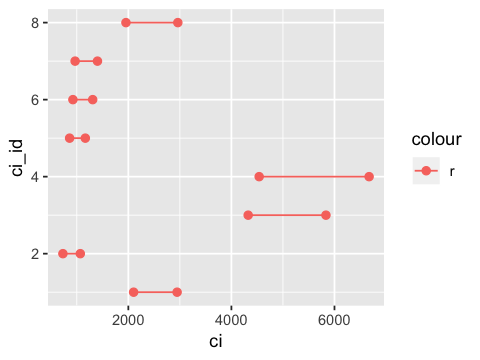

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ пау и ты умеешь строить доверительные интервалы
df_var = df %>% group_by(code) %>% summarise(left = n()*var(price)/qchisq(0.975, df = n() - 1),
                                            right = n()*var(price)/qchisq(0.025, df = n() - 1))

ci_data = data.frame(ci_id = df_var$code,        
                     ci = c(df_var$left, df_var$right))

ggplot(data = ci_data, aes(x = ci, y = ci_id, group = ci_id, color = 'r')) + 
    geom_point(size = 2) +
    geom_line()

__[г]__ Тут надо немного подумать. Предполагая нормальность распределения, постройте $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах. 

__Hint:__ надо понять, какое распределение имеет отношение дисперсий, а после по-честному, отталкиваясь от этого распределния, вывести формулу для доверительного интервала. Роналд Эймлер ##### вам в помощь. 

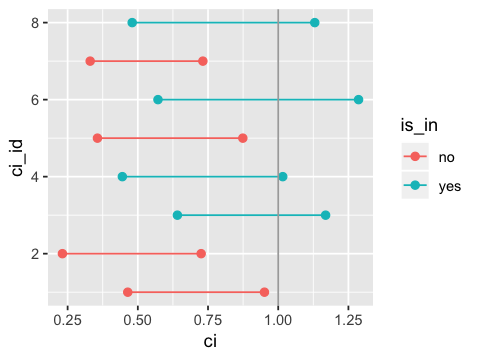

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ любые доверительные интервалы

# Речь идёт про отношение дисперсий, а мы знаем что оно распределено по Фишеру!
alpha = 0.05

# Все расчёты в этой строчке!
df_stat = df_stat %>% mutate(left_s = s1/s2*qf(alpha/2, n1-1, n2-1),
                   right_s = s1/s2*qf(1 - alpha/2, n1-1, n2-1))

# Дальше пошло строительство картинки 
# Отношение дисперсий надо сравнивать с 1 
df_stat = df_stat %>% mutate(is_sin = ifelse(left_s < 1 & right_s > 1, "yes", "no"))  

# 
ci_data = data.frame(ci_id = df_stat$code,        # по оси y будем откладывать id района
                     is_in = df_stat$is_sin,       # раскраска для интервалов
                     ci = c(df_stat$left_s, df_stat$right_s))  # интервалы для оси x 

ggplot(data = ci_data, aes(x = ci, y = ci_id, group = ci_id, color = is_in)) + 
    geom_point(size = 2) +
    geom_line() +
    geom_vline(xintercept = 1, color = "darkgray")

__Ваши интересные выводы:__ 

* Видно, что самый большой разброс в ценах в 3 и 4 районах, т.е. на Северо-Западе. Как покупатель, я скорее найду нужный мне вариант в этих районах.
* Наибольший разброс в ценах получился в 4, 3, 8 районах (1) Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена (2) Северо-запад, вокруг Замоскворецкой линии метрополитена (3) Восток, вокруг Арбатско-Покровской линии метрополитена, возможно это происходит, потому, что, с одной стороны, эти районы близки к центру и там очень респектабельные дома, с другой стороны, там много домов советской постройки с дешевым ремонтом и плохой планировкой.Большой разброс цен вляет на покупателя тем, что покупатель может выбирать жилье из разных вариантов: квартира в центре за дёшево, но с плохим ремонтом, либо хорошая квартира, но дорогая.

### [2] Задачка 6

Слыхали ли вы когда-нибудь про [зефирный тест?](https://ru.wikipedia.org/wiki/Зефирный_эксперимент) В интернетах [можно найти много забавных видео](https://www.youtube.com/watch?v=goZkgVA68iw) про то как его проводят.

__Давайте обсудим суть теста.__ Кладём перед ребёнком зефир. Говорим, что если он его не сожрёт в течение $15$ минут, то дадим ещё один. Оставляем ребёнка в полном одиночистве. Впервые тест проводили в 1960-х в Стенфорде. В 1990-е авторы эксперимента изучили повзрослевших зефирных респондентов и заявили, что те, кто в дестве справился с искушением, оказались гораздо успешнее своих сородичей съевших зефирку. Начиная с этого момента, зефирные приколы стали модными. 

Через какое-то время появилось опровержение зефирного теста. Оказалось, что авторы исследования немножечко налажали с репрезентативностью. Во-первых, ребята отобрали для исследования всего-лишь $90$ детей. Да ещё и всех из детского садика Стэнфорда. Не каждый бедняк может позволить себе такой детский садик. В связи со всем этим возникает вопрос: 

* Что за взаимосвязи на самом деле, скорее всего, нашли авторы? 
* Как все косяки были исправлены в новом исследовании? 

Задачка придумана по мотивам [поста из канала Хулиномика.](https://t.me/hoolinomics) Решение будет просто копи-пастой текста с него. 

__Решение:__ 

Пытливый читатель, копающий тему богатства и успеха, конечно, слышал о знаменитом тесте. Положите перед ребёнком зефир и дайте ему 15 минут подумать. В полном одиночестве. Если малыш выдержит и не сожрёт его, то получит ещё один. Но ребёнок может просто съесть то, что перед ним, – тогда второй зефирки ему не полагается. Вроде бы понятно и логично: потерпи, чтобы получить набежавшие проценты. Как говорится, два раза – это два раза. Когда-то считалось, что успех в этом маленьком тесте гарантирует успех в школе, институте и вообще в жизни. Эксперимент проводили в 1960-х годах, а в 1990-х его авторы изучили повзрослевших испытуемых и громогласно заявили: те, кто в детстве справился с искушением, оказались гораздо лучше устроены по жизни, чем те, кто зефирку сразу съел. Дальше вы понели.

В своё время я очень котировал этот опыт над людьми и всячески поощрял (да и сейчас поощряю) эффект отложенного вознаграждения. Удержать себя от соблазна сейчас, чтобы получить что-то хорошее в будущем. Я стараюсь этот принцип использовать повсеместно, вплоть до того, чтобы парковаться всегда задом, чтобы при выезде не тратить время. Кто его знает, что произойдёт и куда придётся поспешить. Лучше потратить лишнюю минуту и поставить машину таким образом, чтобы выезжать было легко и удобно. И так во всём: сначала помыть посуду, потом пожрать. Сначала полезное, потом вкусное. Сначала уборка, потом ужин. Сначала помятую и мелкую клубничку, потом целенькую и крупную. Сначала жена, потом любовница. Сначала открыть, потом выпить…

Но Джессика Каларко в журнале The Atlantic  представила весьма удивительные новости по этому поводу. Оказывается, дело тут не в силе воле (или сила воли сильно коррелирует с чем-то ещё), а в изобилии и богатстве, которое в семье у ребёнка либо есть, либо хуй.

Новое исследование  Тайлера Уаттса с коллегами блестяще это показало. Во-первых, им показалось (вполне закономерно), что 90 детей в первоначальном эксперименте – это не так уж много. К тому же, все испытуемые были из детского сада при Стэнфорде. На этот раз ребята проверили гипотезу почти на тысяче детей, собранных из всевозможных слоёв общества. При этом они учли важные факторы, такие как, например, материальное положение семьи и образование родителей.

В итоге новое исследование обнаружило довольно слабое подтверждение базовой гипотезы (что способность откладывать удовольствие приводит к успеху в жизни). Вместо этого вышло, что возможность продержаться до второй зефирины большей частью определяется финансовым положением семьи ребёнка – и вот оно-то большей частью и объясняет будущие успехи. А вовсе не умение откладывать удовольствие на потом!

Обнаружилось, что среди детей, мамы которых получили высшее образование, не было никакой разницы в дальнейшей успеваемости. А у тех детей, мамы которых не доучились, преимущество «выигравших» объяснялось социальными факторами, а не способностью дождаться вторую зефирку. Как только исследователи принимали во внимание обстановку в доме трёхлетних испытуемых (например, количество книг на полках, или реакцию мам на просьбы детей), широко воспетая способность «откладывать удовольствие на потом» внезапно переставала означать что-то особенное. Самоконтроль, взятый отдельно от всего, не позволяет детям преодолеть пропасть в благосостоянии и социальном окружении.

Если подумать, то результаты знаменитого теста можно объяснить массой причин. Например, жизнь детей из бедных семей не гарантирует им вообще какую-либо еду, не говоря уже о сладостях. В ожидании ведь есть определённый риск. Даже если родители и обещали им что-то вкусненькое на выходных, вполне вероятно, что финансовая необходимость заставит их поменять своё решение, и вместо обещанных чупа-чупсов мама купит домой пачку риса.

А если вы родились в состоятельной семье, то отложить удовольствие на потом вам не составит особого труда. Опыт подскажет, что финансовое положение семьи стабильно, и у родителей есть ресурсы, чтобы выполнить свои обещания. И даже если такой ребёнок не станет дожидаться второго зефира, у него будет шанс получить вместо него что-то вкусное чуть позже.

Исследователи поведенческой экономики из Гарварда и Принстона написали в 2013 году книгу о бедности  под названием «Скудность . Почему обладание малым означает так много». Дело в том, что состояние нехватки чего-либо изменяет образ мышления людей. Бедность легко может сподвигнуть человека на сиюминутную награду. Маргиналы просто иначе оценивают то, что им доступно. Другими словами, второй зефир не имеет значения, если ты сомневаешься, что тебе вообще достанется зефир.

Эти выводы намекают на то, что бедняки стараются баловать детей при первой возможности, а состоятельные родители имеют склонность поощрять ребёнка дождаться более жирной награды. Краска для волос или конфеты могут показаться дурацким подарком, но не забывайте о том, что это порой единственное, что может себе позволить семья из Тамбовской области. А нищим детишкам какая-никакая сиюминутная радость заметно улучшит несчастную жизнь. Ведь у них нет никакой гарантии, что завтра случится хоть что-то хорошее.

Итак, давайте ещё раз обдумаем привычки бедноты. Во-первых, неоправданно рискованное поведение: наркотики, алкоголь, приятели из криминального мира, ну и там же ранняя беременность. Давай рискнём, детка, вдруг успею вынуть! Нищие с огромным трудом балансируют между работой, учёбой, семьёй, друзьями и супругами. Они по уши в долгах, им постоянно хочется есть, зачастую негде жить, они болеют и не лечатся по-человечески, дорога на работу занимает несколько часов (столько же на учёбу), и спят они по 5 часов в лучшем случае – если не работают во вторую смену. Даже если они и хотят выбиться в люди, их образ жизни сам собой провоцирует вредные для финансового благополучия привычки. Не умея зарабатывать, они не умеют и тратить. А зефир тут, похоже, ни при чём.

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  зефирио

### [10] Задачка 7

Пусть у нас есть выборка $X_1, \ldots, X_n \sim Exp(\alpha)$. Все наблюдения независимые. Когда мы пытаемся методом моментов оценить параметр $\alpha$, мы получаем $\hat \alpha = \frac{1}{\bar x}$. Для начала вам нужно построить асимптотический доверительный интервал для параметра $\alpha$. Сделать это надо двумя способами. 


__Способ 1:__ сделаем репараметризацию и введём параметр $\lambda = \frac{1}{\alpha}$. Для $\lambda$ оценкой метода моментов будет $\bar x$. Постройте на основе ЦПТ асимптотический доверительный интервал для $\lambda$, а после перейдите от неё к $\alpha$. 

__Решение:__ 

Тогда оценкой максимального правдоподобия для $\lambda$ будет как раз $\bar x$. А оно имеет асимптотически нормальное распределение: 

$$
\bar x \sim N (\lambda, \frac{\lambda^2}{n}).
$$

Мы можем построить доверительный интервал для $\lambda$. Мы знаем, что 

$$
\frac{\bar x - \lambda}{\frac{\lambda}{\sqrt{n}}} = \sqrt{n}\left(\frac{\bar x}{\lambda} - 1 \right) = \sqrt{n} (\alpha \bar x - 1) \sim N(0,1),
$$

тогда

$$
- z_{1-\frac{\alpha}{2}}\le \sqrt{n} (\alpha \bar x - 1) \le  z_{1-\frac{\alpha}{2}}.
$$

В итоге получаем:

$$
\frac{1}{\bar x} - z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}} \le \alpha \le \frac{1}{\bar x} + z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}}.
$$

__Способ 2:__ не будем делать никаких репараметризаций. Просто-напросто вспомним, что $\frac{1}{\bar x}$ - это функция от среднего, и мы можем построить для неё распределение на основе дельта-метода. Найдите асимптотическое распределение для $\frac{1}{\bar x}$ и исходя из него постройте доверительный интервал для $\alpha$. 

__Решение:__ наша оценка это функция от среднего! А для таких ситуаций есть дельта-метод, который поможет нам найти характеристики нашего параметра. Ну а дальше всё построится само. 

$$
\begin{aligned}
E(X) = \frac{1}{\alpha} \\  Var(X) = \frac{1}{\alpha^2} \\
g(t) = \frac{1}{t} \\ g'(t) = -\frac{1}{t^2} \\
\end{aligned}
$$

В итоге получаем, что $$\frac{1}{\bar x} \sim N \left(\alpha, \frac{\alpha^2}{n} \right).$$ Исходя отсюда строим доверительный интервал:

$$
\frac{1}{\bar x} - z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}} \le \alpha \le \frac{1}{\bar x} + z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}}
$$


In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ да, чувак, план прост, поэтому и хорош

Пусть уровень доверия $1 - \alpha = 0.95$. Сгенерируйте выборку размера $100$ из экспоненциального распределения. Постройте доверительный интервал. Теперь сгенерируйте выборку размера $200$. Снова постройте доверительный интервал. Насколько уменьшилась его ширина? Выведите формулу, в которой будет явно видно как ширина доверительного интервала зависит от размера выборки. 

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ когда план сложный

alpha = 0.05
n = 100

x = rexp(n, 5) 
z = qnorm(1-alpha/2)


left <- 1/mean(x) - z*1/ (mean(x)*sqrt(n))
right <- 1/mean(x) + z*1/ (mean(x)*sqrt(n))

cat('alpha с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left)   

alpha с вероятностью 95% лежит между 3.960443 и 5.891361 
Длина интервала: 1.930918

In [30]:
alpha = 0.05
n = 200

x = rexp(n, 5) 
z = qnorm(1-alpha/2)

left <- 1/mean(x) - z*1/ (mean(x)*sqrt(n))
right <- 1/mean(x) + z*1/ (mean(x)*sqrt(n))

cat('alpha с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left) 

alpha с вероятностью 95% лежит между 4.744407 и 6.271042 
Длина интервала: 1.526635

__Формула для длины:__ 

$$
right - left = 2 \cdot z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}}
$$

In [31]:
2*z*1/(mean(x)*sqrt(n))

[1] 1.526635

Предположим, что мы теперь хотим построить оценку метода моментов для $\alpha^2$. Так как это дисперсия, исходя из метода моментов, логично взять оценку $\frac{1}{\bar x^2}$. Найдите асимптотическое распределение этой оценки с помощью дельта-метода. Постройте доверительный интервал для неё на основе выборки, сгенерированной выше.


$$
\begin{aligned}
E(X) = \frac{1}{\alpha} \\  Var(X) = \frac{1}{\alpha^2} \\
g(t) = t^2 \\ g'(t) = 2 \cdot t \\
\end{aligned}
$$

В итоге получаем, что $$\bar x^2 \sim N \left(\frac{1}{\alpha^2}, \frac{1}{n \cdot \alpha^2} \cdot \frac{4}{\alpha^2} \right).$$ Исходя отсюда строим доверительный интервал:

$$
\frac{1}{\bar x^2 \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{2 \cdot \bar x^2}{\sqrt{n}}}
$$


In [32]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ всё может пойти наперекосяк

left <- 1/(mean(x)^2 + z*2*mean(x)^2*1/sqrt(n))
right <- 1/(mean(x)^2 - z*2*mean(x)^2*1/sqrt(n))

cat('alpha с вероятностью 95% лежит между',left, 'и',right, '\n')
cat('Длина интервала:', right-left) 

alpha с вероятностью 95% лежит между 23.75155 и 41.96765 
Длина интервала: 18.2161

### [2] Задачка 8 (Квантильное-1)

Сгенерируйте выборку для случайной величины, которая обладает следующей функцией распределения:


$$
F(x) = \begin{cases} 0, x \le 0 \\ \sin(x), x \in (0, \pi/2] \\ 1, x>\pi/2 \end{cases}
$$


[1] 1.569359

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


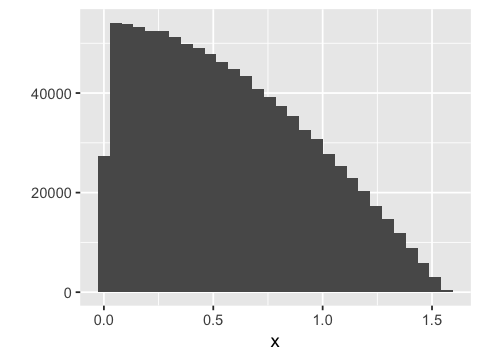

In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ пау! пау! пау!

y = runif(10^6,min = 0, max=1) 
x = asin(y)
max(x)
qplot(x)

### [4] Задачка 9

Мы знаем, что для выборки $X_1, \ldots, X_n \sim iid N(\mu, \sigma^2)$ хорошими оценками параметров будут

\begin{aligned} 
& \hat \mu = \bar x = \frac{1}{n} \sum_{i=1}^n x_i \\
& \hat \sigma^2 = s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2.
\end{aligned}

У этих оценок есть ещё одна полезная особенность. Случайные величины $\hat \mu$ и $\hat \sigma^2$ независимы. 

__[a]__ Покажите, что эти две величины независимы с помощью симуляций.

Давайте вспомним важную штуку. Нулевая ковариация не означает независимости. Пример, когда ковариация нулевая, но зависимость есть, лежит в первой домашке. Две случайные величины называются независимыми, если 

$$
F(x,y) = F(x) \cdot F(y).
$$

Если мы хотим на симуляциях убедиться в их независимости, нужно генерить эмпирические функции распределения. Этим и займёмся. 

In [34]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сккккрааа! 

# Сгенерируем две выборки большоооого размера :) 
n_obs = 10^6

mu = rep(0, n_obs)
s2 = rep(0, n_obs)

for(i in 1: n_obs){
    x = rnorm(1000, mean=5, sd=1)
    mu[i] = mean(x)
    s2[i]= var(x)   
}

In [35]:
cor(mu, s2) # ради интереса

[1] -0.0001503509

In [36]:
# Шкалы, чтобы сравнивать
x = seq(min(mu), max(mu), len=100)
y = seq(min(s2), max(s2), len=100)

Заведём две матрицы. В одну будем записывать $F(x,y)$, а во вторую $F(x) \cdot F(y)$. 

In [37]:
f_xy = matrix(rep(0, length(x)*length(y)),nrow=length(x))
fx_fy = matrix(rep(0, length(x)*length(y)),nrow=length(x))

# а затем матрицу 
for(i in 1:length(x)){
    for(j in 1:length(y)){
       f_xy[i,j] = mean(mu <= x[i] & s2 <= y[j])
       fx_fy[i,j] = mean(mu <= x[i]) * mean(s2 <= y[i])
        
    }
}

Отлично! Теперь нам надо убедиться, что все произведения совпадают с совместной функцией распределения с точностью до какой-то погрешности. 

In [38]:
# Больше половины случаев неплохо (наверное)
sum(abs(f_xy - fx_fy) < 0.1)

[1] 6030

__[b]__ Докажите это руками. 

__Hint:__ во втором пункте для начала найдите $Cov(x_1, x_1 - \bar x)$.

__Решение:__ 

Хотим доказать, что $\bar x$ не зависит от $s^2$. Для начала докажем, что $\bar x$ независит от $(x_1 - \bar x), \ldots, (x_n - \bar x)$. Мы знаем, что $x_1$ нормальная. Значит $\bar x$ и $x_i - \bar x$ тоже нормальные. Значит, если ковариация между ними нулевая, тогда эти случайные величины будут независимыми. Найдём её

$$
Cov(\bar x, x_1 - \bar x) = E[\bar x \cdot (x_1 - \bar x)] - E(\bar x) \cdot E(x_1 - \bar x) = E[\bar x \cdot (x_1 - \bar x)] - E(\bar x) \cdot (\mu - \mu) =  E[\bar x \cdot (x_1 - \bar x)]
$$

Помним, что $E(X^2) = Var(X) + E(X)^2$. Воспользуемся этим фактом два раза и наведём кучу арифметики: 

\begin{multline*}
E[\bar x \cdot (x_1 - \bar x)] = E[\bar x \cdot x_1] - E(\bar x^2) = E[\bar x \cdot x_1] - \left(\frac{\sigma^2}{n} + \mu^2 \right) = \\ = \frac{1}{n} \cdot \sum_{i =2}^n E(x_i) \cdot E(x_1) + \frac{1}{n} E(x_1^2) - \left(\frac{\sigma^2}{n} + \mu^2 \right) = \frac{(n-1) \cdot \mu^2}{n} +\frac{\sigma^2 + \mu^2}{n} - \frac{\sigma^2}{n} - \mu^2 = 0
\end{multline*}

Получилось, что $\bar x$ независима от всех компонент $(x_i - \bar x)$. Выборочная дисперсия $s^2$ это функция от случайных величин $x_i - \bar x$. Значит она тоже независит от $\bar x$. 

### [2] Задачка 10

Пусть случайная величина $X$ - цвет конфетки M&M's из упаковки. Она имеет распределение:


|$X$             | красная    | жёлтая  | другой цвет  |
|:--------------:|:----------:|:-------:|:------------:|
| $P( \ldots )$  | $p_1$      | $p_2$   | $1 - p_1-p_2$|


Если у нас завалялась выборка из конфеток $X_1, \ldots, X_n$  и в ней $n_1$ конфеток оказались красными, а $n_2$ жёлтыми, тогда хорошими оценками для $p_1$ и $p_2$ будут $\frac{n_1}{n}$ и $\frac{n_2}{n}.$

С помощью симуляций выясните, являются ли случайные величины $\hat p_1$ и $\hat p_2$ независимыми. 

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ эщ
n = 10^6

p1 = rep(0, n)
p2 = rep(0, n)

for(i in 1:n){
    x = sample(size = 100, replace = TRUE, x=c(1,2,3), prob = c(0.7, 0.2, 0.1))
    p1[i] = mean(x == 1)
    p2[i] = mean(x == 2)
}

cor(p1, p2)

[1] -0.7637909

В математике да это всегда да, а нет это хотябы один раз нет. 

### [10] Задачка 11

У Дианы есть выборка $X_1, \dots, X_n \sim iid N(0, \sigma^2)$. Она собирается использовать для параметра $\sigma$ нестандартную оценку $\hat \sigma = \frac{1}{n} \sum_{i=1}^n |x_i|$. Вручную: 

__[a]__ Найдите плотность распределения для случайной величины $|X|$

__Решение:__ 

\begin{equation*}
\begin{aligned}
& F(y) =  P(Y \le y) = P(|X| \le y) = P(-y \le X \le y) = F(y) - F(-y) \\
& f(y) = F'(y) = f(y) + f(-y) = 2 f(y) = \frac{2}{\sqrt{2 \pi \sigma^2}} \cdot e^{- \frac{y^2}{2 \sigma^2}}.
\end{aligned} 
\end{equation*}

Найдём математическое ожидание. Для этого под знаком интеграла сделаем замену $t = \frac{y^2}{2 \sigma^2}$. Получится, что $y = \sqrt{2 t \sigma^2}$, $dy = \frac{2 \sigma^2}{ 2 \sqrt{2 \sigma^2 t}} dt$. Пределы интегрирования никак не поменяются. Такой заменой мы приведём интеграл к удобоваримому виду: 

\begin{multline*}
E(Y) = \int_0^{+\infty} \frac{2y}{\sqrt{2 \pi \sigma^2}} \cdot e^{- \frac{y^2}{2 \sigma^2}} dy = \frac{\sqrt{2 \sigma^2}}{\sqrt{2 \sigma^2}} \cdot \sigma^2 \cdot \frac{2}{\sqrt{2 \pi \sigma^2}} \cdot \int_0^{+ \infty} e^{-t} dt = \sqrt{\frac{2}{\pi}} \cdot \sqrt{\sigma^2}.
\end{multline*}

Теперь найдём дисперсию. Так как  $E(Y^2) = E(|X|^2) = E(X^2) = \sigma^2$, получаем что 

$$
Var(Y) = \sigma^2 - \frac{2}{\pi} \cdot \sigma^2 = \left(1 - \frac{2}{\pi} \right) \cdot \sigma^2.
$$

__[б]__ Проверьте, является ли оценка $\hat \sigma$ смещённой, найдите её $bias$, если оценка смещена, то скорректируйте её

__Решение:__


$$
E(\hat \sigma) = E \left( \frac{1}{n} \sum_{i=1}^n |X_i|   \right) = E(Y) = \sqrt{\frac{2}{\pi}} \cdot \sigma.
$$

Оценка оказалась смещена. Построим исправленную оценку так, чтобы при поиске математического ожидания от неё лишняя константа сгорала: 

\begin{equation*}
 \hat \sigma = \sqrt{\frac{\pi}{2}} \cdot  \frac{1}{n} \sum_{i=1}^n |X_i| 
\end{equation*}

Найдём смещение оценки: 

\begin{equation*}
bias(\hat \sigma) = E(\hat \sigma) - \sigma =  \sqrt{\frac{2}{\pi}} \sigma - \sigma.
\end{equation*}

__[в]__ Найдите дисперсию скорректированной оценки

__Решение:__

Найдём дисперсию для базовой оценки: 

$$
Var(\hat \sigma) = \frac{1}{n} Var(Y) = \frac{1}{n} \cdot \left(1 - \frac{2}{\pi} \right) \cdot \sigma^2.
$$

Найдём дисперсию для скорректированной оценки: 

$$
Var(\hat \sigma)  = \frac{1}{n} \cdot \left( \frac{\pi}{2} - 1 \right) \cdot \sigma^2.
$$

__[г]__ Определите, является ли оценка состоятельной


 По закону больших чисел среднее случайных величин сходится к их математическому ожиданию, то есть 

$$
\hat \sigma \to \sqrt{\frac{\pi}{2}}  \cdot \sqrt{\frac{2}{\pi}} \cdot \sigma = \sigma.
$$

Да, скорректированная оценка является состоятельной. 

__[д]__ Найдите для несмещённой оценки $MSE$

Найдём двумя способами MSE. Во-первых,  

$$
MSE = bias(\hat \sigma)^2 + Var(\hat \sigma) = \left[ \frac{1}{n} + \frac{2}{\pi} \cdot \left(1 - \frac{1}{n} \right) - 2 \cdot \sqrt{\frac{2}{\pi}} + 1   \right] \cdot \sigma^2.
$$

Во-вторых: 

\begin{multline*} 
MSE=  (\hat \sigma - \sigma)^2 = E \left( \frac{1}{n} \sum |X_i| - \sigma \right)^2  = E \left[ \left( \frac{1}{n} \sum |X_i| \right)^2 - 2 \cdot \frac{\sigma}{n} \sum |X_i| + \sigma^2 \right] = \\ = \frac{1}{n^2} E[ (|X_1| + \ldots + |X_n|)^2] - \frac{2 \sigma}{n} \sum E(|X_i|) + \sigma^2 = \frac{1}{n^2} \cdot (n E(X^2) + n (n-1) E(X)^2) - \frac{2 \sigma}{n} \sum E(|X_i|) + \sigma^2 = \\ = \frac{\sigma^2}{n} + \frac{n-1}{n} \cdot \frac{2}{\pi} \sigma^2 - 2 \sigma \cdot \sqrt{\frac{2}{\pi}} \cdot \sigma + \sigma^2  = \left[ \frac{1}{n} + \frac{2}{\pi} \cdot \left(1 - \frac{1}{n} \right) - 2 \cdot \sqrt{\frac{2}{\pi}} + 1  \right] \cdot \sigma^2.
\end{multline*}

Пусть природа решила, что $\sigma^2 = 16$. С помощью симуляций проверьте

__[е]__ Несмещённость оценки

In [40]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ взбздых и ты на изи решаешь любые теоретические задачи
s2 = 16

n_obs = 10^6

s_hat = rep(0, n_obs)

for(i in 1: n_obs){
    x = rnorm(100, mean=0, sd=sqrt(s2))
    s_hat[i] = mean(abs(x))
}

mean(s_hat)

[1] 3.191393

Видим, что математическое ожидание отличается от $4$. Оценка смещена. 

In [41]:
sqrt(pi/2)*mean(s_hat) # скорректировали и получили хорошую оценку :) 

[1] 3.999817

__[ж]__ Состоятельность оценки 

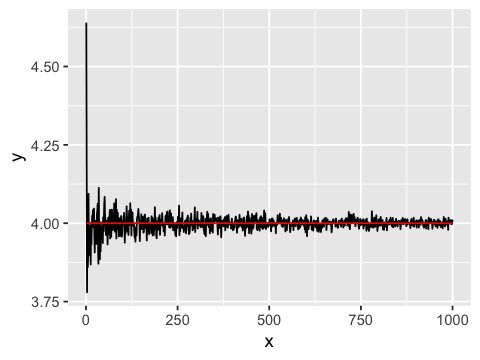

In [42]:
n_obs = 10^3

s_hat = rep(0, n_obs)

for(i in 1: n_obs){
    x = rnorm(i*100, mean=0, sd=sqrt(s2))
    s_hat[i] = sqrt(pi/2)*mean(abs(x))
}

ggplot(data.frame('x'=1:n_obs, 'y'=s_hat)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, sqrt(s2)), col='red')

__[з]__ Постройте на одном графике распределение для  скорректированной на смещение $\hat \sigma$ из условия задачи, а также для классической $\hat s$. Какая из них эффективнее? 

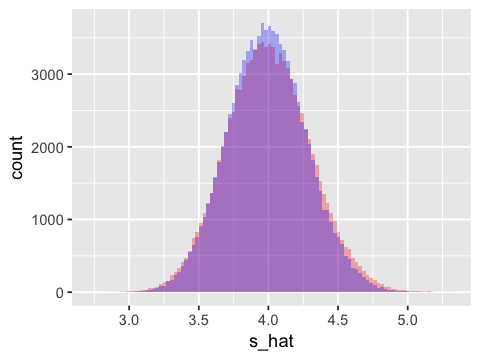

In [43]:
n_obs = 10^5

s_hat = rep(0, n_obs)
s_canon = rep(0, n_obs)

for(i in 1: n_obs){
    x = rnorm(100, mean=0, sd=sqrt(s2))
    s_hat[i] = sqrt(pi/2)*mean(abs(x))
    s_canon[i] = sd(x)
}

ggplot(data.frame(s_hat, s_canon)) +
    geom_histogram(aes(x=s_hat),bins=100, alpha=0.3, fill='red')+
    geom_histogram(aes(x=s_canon),bins=100, alpha=0.3, fill='blue')

In [44]:
var(s_hat)
var(s_canon)

[1] 0.09087688

[1] 0.08018181

In [45]:
# По генерации видим, что купол канонической оценки вытянут вверх сильнее, 
# а хвосты тоньше, значит она эффективнее
# Подсчёт дисперсии подвтерждает это :) 

### [2] Задачка 12  (Квантильное-2)

Пущай у нас есть стрёмная функция распределения. Например, вот такая: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Давайте сгенерим из неё выборку с помощью квантильного преобразования. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


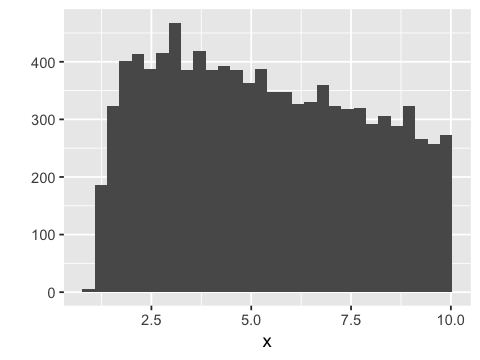

In [46]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  Жалеть нужно не мёртвых, Гарри. Жалеть нужно живых. 

# для примера выберем какие-нибудь значиния параметра
theta = 10
alpha = 2

y = runif(10^4, min = 0, max = 1)
x = theta^(y^(1/alpha))
qplot(x)

### [4] Задачка 13

Помните страшную функцию распределения из предыдущей задачи? 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

__[а]__ Найдите для параметра $\alpha$ оценку методом моментов. Возьмите для оценки математическое ожидание $E(\ln X)$. Для него можно легко взять интеграл. С помощью дельта-метода выясните, как именно распределена полученная оценка и постройте для неё доверительный интервал. 

__Решение:__ 

Найдём математическое ожидание логарифма и его дисперсию: 

\begin{equation*}
\begin{aligned}
& E(\ln X) = \int_1^{\theta} \ln x \cdot F'(x) dx = \frac{a}{1+a} \cdot \ln \theta \\
& E(\ln^2 X) = \int_1^{\theta} \ln^2 x \cdot F'(x) dx = \frac{a}{2+a} \cdot \ln^2 \theta \\ 
& Var(\ln X) = E(\ln^2 X) - (E(\ln X))^2 = \frac{a}{(1 + a)^2 \cdot (2 + a)} \cdot \ln^2 \theta 
\end{aligned}
\end{equation*}

Найдём методом моментов оценку для $\theta$, приравняв теоретический момент к эмпирическому: 

$$
\overline{\ln x} = \frac{a}{1+a} \cdot \ln \theta \Rightarrow \hat a = \frac{\overline{\ln x}}{\ln \theta - \overline{\ln x}}
$$

По ЦПТ мы знаем, что 

$$
\overline{\ln x} \overset{asy}{\sim} N \left( \frac{a}{1+a} \cdot \ln \theta; \frac{1}{n} \cdot \frac{a}{(1 + a)^2 \cdot (2 + a)} \cdot \ln^2 \theta  \right)
$$

Воспользуемся дельта-методом. 

\begin{equation*}
\begin{aligned}
& g(t) = \frac{t}{\ln \theta - t} \\ 
& g'(t) = \frac{\ln \theta}{(\ln \theta - t)^2} \\ 
& g(\mu) = a \\
& g'(\mu) = \frac{(a + 1)^2}{\ln \theta}
\end{aligned}
\end{equation*}

Получается, что 


$$
\hat a \overset{asy}{\sim} N \left(a; \frac{1}{n} \cdot \frac{a \cdot (1 + a)^2}{(2 + a)} \right)
$$

Ровно по той же логике, как и в семинаре по доверительным интервалам (теорема Слуцкого), мы можем поменять в дисперсии $a$ на $\hat a$ и сказать, что 


$$
\hat a \overset{asy}{\sim} N \left(a; \frac{1}{n} \cdot \frac{\hat a \cdot (1 + \hat a)^2}{(2 + \hat a)} \right)
$$

В итоге получаем асимптотический доверительный интервал 

$$
\hat a \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{ \frac{\hat a \cdot (1 + \hat a)^2}{n \cdot (2 + \hat a)}}
$$




__[б]__ Сгенерируйте выборку объёма $1000$. Сделайте подвыборку объёма $100$. Постройте для этой подвыборки $80\%$ асимптотический доверительный интервал.

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  хаос - это не провал, хаос - это лестница! 

# сгенерировали в прошлом упражнении! 
n = 100
x_sample = sample(x = x, size = n)

alpha = 0.05
z_alpha = qnorm(1 - alpha/2)

# будем считать, что theta известно 
a_hat = mean(log(x))/(log(10) - mean(log(x)))

left = a_hat - z_alpha*sqrt(a_hat*(1 + a_hat)^2/(n*(2+a_hat)))
right = a_hat + z_alpha*sqrt(a_hat*(1 + a_hat)^2/(n*(2+a_hat)))
cat('Доверительный интервал:', left, right)

Доверительный интервал: 1.60692 2.449148

### [4] Задачка 14

Пусть случайные величины $X_1, \ldots, X_n \sim U[0;1]$ и независимы. С помощью дельта-метода выясните, как примерно распределено среднее геометрическое: 

$$
Z = \sqrt[100]{\prod_{i=1}^{100} x_i}.
$$

Не забывайте, что логарифм произведения равен сумме логарифмов. 

__Решение:__ 

$$
\ln Z = \frac{1}{100} \sum_{i=1}^{100} \ln x_i.
$$

Это среднее. К нему можно применить ЦПТ. Для этого нам понадобится $E(\ln X_1)$ и $Var(\ln X_1)$. Найдём их

\begin{equation*}
\begin{aligned}
& E(\ln X_1) = \int_0^1 \ln x dx = -1 
& E(\ln^2 X_1) = 2
& Var(\ln X_1) = 2 - (-1)^2 = 1
\end{aligned}
\end{equation*}

Выходит, что по ЦПТ 

$$
\overline{\ln x} \sim N \left( -1, \frac{1}{100} \right).
$$

У нас $g(t) = e^t$. Воспользовавшись дельта-методом получаем, что 

$$
Z = e^{\overline{\ln x}} \sim \sim N \left( \frac{1}{e}, \frac{1}{100} \cdot \frac{1}{e^2} \right).
$$

In [48]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  код не нужен

### [3 + бонусные 5] Задачка 15

В этой задачке делаем первый заход на сходимости случайных величин. 

__[a]__ Докажите, что последовательность случайных величин  $X_n \sim Binomial\left(n, \frac{\lambda}{n}\right)$ сходится по распределению к распределению Пуассона с параметром $\lambda$. 

__Решение:__ 

Выпишем для случайной величины $X_n$ вероятность того, что она принимает конкретное значение $k$. Так как $X_n$ имеет биномиальное распределение, 

$$
P(X_n = k) =  C_{n}^k \cdot \left( \frac{\lambda}{n} \right)^k \cdot \left(1-\frac{\lambda}{n} \right) ^{n-k} = \frac{n!}{k! (n-k)!} \cdot \left( \frac{\lambda}{n} \right)^k \cdot \left(1-\frac{\lambda}{n} \right) ^{n-k}
$$

Нам нужно выяснить как ведёт себя это выражение при $n \to \infty$. Значение $k$ остаётся постоянным. 

$$
\lim_{n\to\infty} P(X_n = k) = \lim_{n\to\infty} \frac{\lambda^k}{k!} \cdot \frac{n \cdot (n-1) \cdot (n-2) \cdot \ldots \cdot (n-k+1)}{n^k} \cdot \left( 1-\frac{\lambda}{n} \right)^n \cdot \left(1-\frac{\lambda}{n} \right)^{-k} = \frac{\lambda^k \cdot e^{-\lambda}}{k!}
$$

Первый множитель выносится за знак предела, так как там $k$ фиксировано. Во втором множителе степено числителя равна $k$, степень знаменателя также равна $k$. Выходит, что в пределе выйдет единица. Третий множитель - это второй замечательный предел. Четвёртый множитель в пределе даёт единицу.

\begin{equation*}
\begin{aligned}
& \lim_{n\to\infty} \frac{n \cdot (n-1) \cdot (n-2) \cdot \ldots \cdot (n-k+1)}{n^k} = 1 \\ 
& \lim_{n\to\infty} \left(1-\frac{\lambda}{n} \right)^{-k} = 1^{-k} = 1 \\
& \lim_{n\to\infty} \left( 1-\frac{\lambda}{n} \right)^n = e^{-\lambda}
\end{aligned}
\end{equation*}

Получаем в пределе распределение Пуассона. 

__[б]__ Докажите, что последовательность случайных величин 	$X_n \sim Geom(\frac{\lambda}{n})$, $Y_n = \frac{1}{n} X_n$ сходится по распределению к экспоненциальному распределению с параметром $\lambda$. 

__Решение:__ 

Нам надо понять к чему сойдётся вероятность $P(Y_n \le y) = P(\frac{1}{n} \cdot X_n \le y) = P(X_n \le n \cdot y)$. Случайная величина $X_n$ имеет геометрическое распределение с параметром $p = \frac{\lambda}{n}$. Кажется начал проступать рецепт решения задачки. Нужно нащупать функцию распределения для геометрической случайной величины, а после найти её предел. 

$$
P(X_n \le x) = \sum_{k=1}^x (1-p)^{k-1} \cdot p = p \cdot \sum_{k=1}^x (1-p)^{k-1} = p \cdot \frac{1 - (1-p)^x}{1 - (1-p)} = 1 - (1 - p)^x.
$$

Тут мы просто воспользовались определением функции распределения и формулой для суммы геометрической прогрессии.

Величина $n \cdot y$ может принимать любые действительные значения. Георметрически распределённая случайная величина принимает только целые значения. Когда будем подставлять $n \cdot y$ вместо $x$ в сумму, сделаем округление вниз. Обычно такое округление обозначают как $\lfloor n \cdot y \rfloor$. Остаётся только вспомнить второй замечательный предел, и получить ответ: 

$$
\lim_{n \to \infty} P(X_n \le n \cdot y) = 1 - \left(1 - \frac{\lambda}{n} \right)^{\lfloor n \cdot y \rfloor} = 1 - e^{- \lambda y}.
$$

__[в]__ Случайные величины $X_n \sim U[a;b]$. Пусть $Y_n = \max(X_1, \ldots, X_n)$. Покажите, что 
		
$$
Z_n = n \cdot \frac{b - Y_n}{b - a} \overset{d}{\to}  Exp(1)
$$  

__Решение:__ 

Мы помним, что 

$$
F_{Y_n}(Y_n \le y) = P(Y_n \le y) = P(\max(X_1, \ldots, X_n) \le y) = P(X_1 \le y) \cdot \ldots \cdot P(X_n \le y) = [F_X(y)]^n = \left[ \frac{x-a}{b-a}  \right]^n
$$

Теперь нам нужно пристально посмотреть на $Z_n$: 

\begin{multline*}
F_{Z_n}(z) = P(Z_n \le z) = P \left( \frac{b-Y_n}{b-a} \cdot n \le z \right) = P \left(-Y_n \le \frac{z \cdot (b-a)}{n} - b \right) = \\ = 1 - P \left(Y_n \le  b - \frac{z}{n}\cdot(b-a)\right) =  1 - F_{Y_n} \left( b-\frac{z}{n} \cdot (b-a)\right) = 1 - \left(1 - \frac{z}{n} \right)^n
\end{multline*}

Теперь найдём предел. 

$$
\lim_{n\to \infty} F_{Z_n} (z) = \lim_{n\to \infty} 1- \left(1-\frac{z}{n} \right)^n = 1- e^{-z}
$$

Получаем экспоненциальное распределение. Тут, на самом деле, хорошо было бы по-честному расписать что происходит с функцией $F_{Z_n}(z)$ при разных значениях $z$ и найти ту самую единственную и неповторимую точку разрыва. Пример того, как это делается у вас есть в семинаре :) 

__[г]__ __Бонусный пункт:__  Пусть $X \sim Exp\left(\frac{1}{\lambda} \right)$. Пусть $F(x)$ — функция распределения для $Exp(1)$. Нужно найти распределение случайной величины $Y = F(X)$. И выяснить к чему сходится это распределение при $\lambda \to \infty$, при $\lambda \to 1$ и при $\lambda \to 0$.

__Решение:__ 

Нас интересует случайная величина $Y = 1 - e^{-X}$. Мы знаем, что $F(x)$ - функция распределения, значит $Y$ принимает значения на отрезке от $0$ до $1$. Найдём функцию распределения случайной величины $Y = F(X)$. Будем делать это по определению: 

$$
F(y) = P(Y \le y) = \begin{cases}0, \text{ если } y \le 0 \\ 1, \text{ если } y > 1 \\ P(F(X) \le y), \text{ если } y \in (0; 1].    \end{cases}
$$

Самая интересная тут последняя строчка. Немного поработаем с ней.

$$
P(F(X) \le y) = P(X \le F^{-1}(y)) = P \left( X \le - \ln(1 - y) \right) = F_X \left( - \ln(1 - y)  \right) = 1-{(1-y)}^{\frac{1}{\lambda}}.
$$

Дело осталось за малым, найти пределы для функции распределения случайной величины $Y$. Если $\lambda \to \infty$, получаем в пределе единицу. То есть 

$$
F(y) = P(Y \le y) = \begin{cases}0, \text{ если } y \le 0 \\ 1, \text{ если } y > 0 \end{cases}
$$

Получилось выражденное распределение. Случайная величина принимает только одно значение, равное $1$. Если $\lambda \to 1$, получаем в пределе $y$, то есть равномерное распределение 

$$
F(y) = P(Y \le y) = \begin{cases}0, \text{ если } y \le 0 \\ 1, \text{ если } y > 1 \\ y, \text{ если } y \in (0; 1].    \end{cases}
$$

При $\lambda \to \infty$ получаем, что сходимости по распределению нет, так как для интервала $(0;2)$ выполняется сходимость к $1$, а для оставшейся части функция уходит на бесконечность. Чтобы сходимость по распределению имела место, у нас должно быть конечное число точек с разрывами. 






In [49]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  код снова не нужен

### [13] Задачка 16

Определите как (по распределению, по вероятности, в среднем) и к чему сходятся следущие последовательности случайных величин: 

* $X_n \sim U\left[0 ; \frac{1}{n} \right]$
* $X_n \sim N\left(0, \frac{1}{n}\right)$ 
* $X_n \sim Exp(n)$
* $X_n \sim Exp\left(\frac{1}{n} \right)$
* $X_n \sim Bern\left(\frac{1}{n}\right)$
* $X_n \sim N\left(\frac{n-1}{n+1}, 9\right)$
* $X_n \sim N\left(0, \frac{5 + n}{n^2}\right)$
* $X_n \sim N \left(\frac{n-8}{n^2 + 8}, \frac{n+1}{n-1} \right)$
* $X_n \sim t(n)$
* $X_n = \frac{Y_n}{n}$, где $Y_n \sim \chi^2_n$
* $X_n = \frac{Y_n}{n+5}$, где $Y_n \sim \chi^2_n$
* $X_n = 2011 \cdot  Y_n$, где $Y_n \sim F_{2011,n}$
* $X_n = \frac{Y_n - n}{\sqrt{n}}$, где $Y_n \sim \chi^2_n$

За каждую последовательность ставится $1$ балл. Обоснование должно быть дано максимально чётко. 

In [50]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  код опять не нужен

__В этой задаче все решения, по большей части однотипны. Иногда надо было обращать внимание на кое-какие тонкие нюансы. Мне очень лениво вбивать все решения. Но если вам ну очень хочется узнать правильное решение какого-либо из этих пунктов, пишите в личку, я его распишу для вас на бумажке.__

### [4] Задачка 17

У распределения Хи-квадрат есть милое свойство. Известно, что если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций в R, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

__Важно:__ вы же понимаете, что это свойство следует из ЗБЧ? 

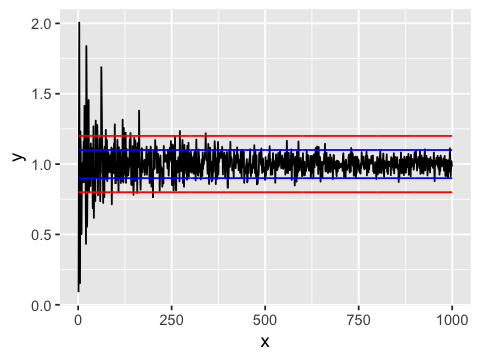

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ скибиди па!

n_obs = 10^3       # число симуляций
s = rep(0, n_obs)  # сюда будем закидывать члены последовательности

for(i in 1:n_obs){
    s[i] = mean(rnorm(i)^2)
}

eps1 = 0.2
eps2 = 0.1

ggplot(data.frame('x'=1:n_obs, 'y'=s)) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, 1+eps1), col='red')+
  geom_line(aes(x, 1-eps1), col='red')+

  geom_line(aes(x, 1+eps2), col='blue')+
  geom_line(aes(x, 1-eps2), col='blue')

Хорошо! Теперь зафиксируйте несколько коридоров также, как мы делали это на паре и пронаблюдайте, как ведут себя вероятности пробить эти коридоры при увеличении $n$.

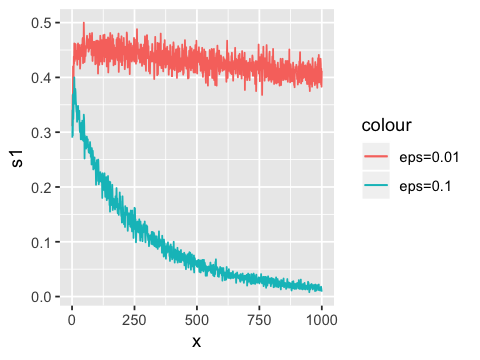

In [52]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ зенда фаразенда

n_obs = 10^3
s1 <- rep(0,times=n_obs) # вектор из нулей для первого коридора
s2 <- rep(0,times=n_obs) # вектор из нулей для второго коридора

for(i in 1:n_obs){
    x <- rep(0,times=1000)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i)^2)
    }
    s1[i] <- sum(abs(x) > 1+0.01)/1000
    s2[i] <- sum(abs(x) > 1+0.1)/1000
    }

ggplot(data.frame('x'=1:n_obs, 's1'=s1, 's2'=s2)) + 
  geom_line(aes(x, s1, color='eps=0.01')) +
  geom_line(aes(x, s2, color='eps=0.1'))

# для узкого коридора убывание идёт совсем медленно :) 

Учитывая, что последовательность случайных величин, приведённая выше, сходится к константе, то есть к вырожденному распределению, дисперсия этой последовательности должна сходится к нулю. Продемонстрируйте, что это действительно так. Для этого нужно скопипастить код из второго пункта и немного отредактировать его.  

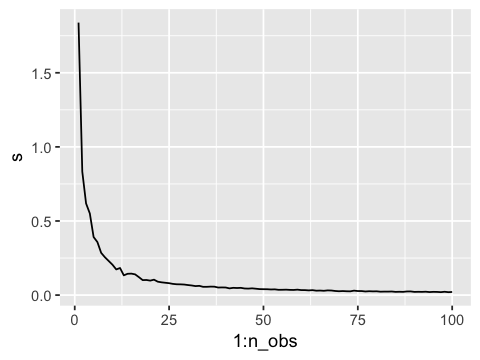

In [53]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ратата! 

n_obs = 100
s <- rep(0,times=n_obs) # вектор из нулей для дисперсий

for(i in 1:n_obs){
    x <- rep(0,times=1000)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i)^2)
    }
    s[i] <- var(x)
    }

qplot(1:n_obs, s, geom='line')

Если вы хорошо разбирались в лекциях по математической статистике, у вас должна была возникнуть в голове аналогия с Достаточным условием Чебышёва. Оно говорит, что если оценка неизвестного параметра является несмещённой, $E(\hat \theta) = \theta$ и дисперсия этой оценки стремится к нулю, $Var(\hat \theta) \to 0$ при $n \to \infty$, то эта оценка состоятельна. 

Попробуйте ещё раз посмотреть на картинку, которую вы получили выше и переосмыслить это условие. Также не помешает немного подумать о состоятельности оценки и вспомнить определение состоятельности. 

### [6] Задачка 18 (распределение Коши) 

Распределение Коши тот ещё фрукт. У стандартного распределения Коши следующая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит довольно красиво, но эта красота обманчива. У распределения Коши есть куча проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. Закон больших чисел позволяет нам сказать, что для некоторых распределений 

$$ P( \mid \bar x - E(X)\mid \le \varepsilon  ) \to 1, $$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Как мы знаем, для распределения Коши математического ожидания не существует. Интересно было бы узнать к чему в таком случае сходится выборочное среднее. Для решения вам понадобится функция `rcauchy`.

Постройте для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ. Попытайтесь проинтерпретировать то, что вы увидите. Если не получается, не печальтесь. Когда я печалюсь, я обычно перестаю печалиться и просто становлюсь клёвым. И это правда. Советую вам делать также. 

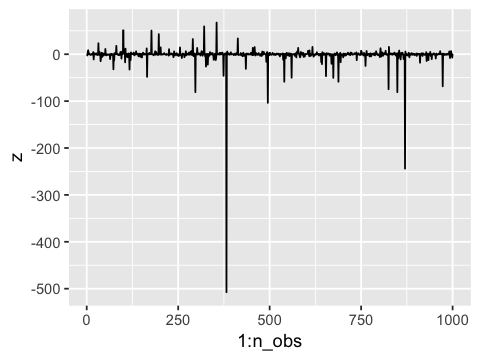

In [54]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ авада кедавра

# Чудо, а не задание! Копипаста кода и замена распределения на Коши :) 

n_obs = 10^3
z = rep(0, n_obs)  # вектор для средних

for(i in 1:n_obs){
    z[i] = mean(rcauchy(i))
}

qplot(1:n_obs, z, geom='line')

Хорошо! Теперь зафиксируйте несколько коридоров также, как мы делали это на паре и пронаблюдайте, как ведут себя вероятности пробить эти коридоры при увеличении $n$.

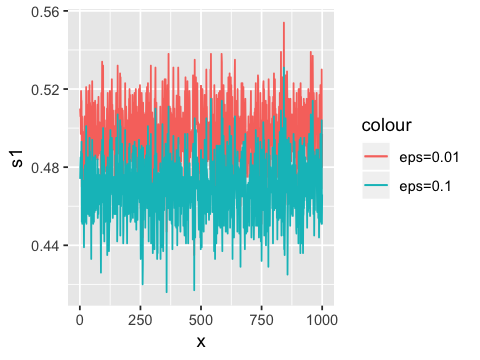

In [55]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ империо

n_obs = 10^3
s1 <- rep(0,times=n_obs) # вектор из нулей для первого коридора
s2 <- rep(0,times=n_obs) # вектор из нулей для второго коридора

for(i in 1:n_obs){
    x <- rep(0,times=1000)
    for(j in 1:1000){
        x[j] <- mean(rcauchy(i))
    }
    s1[i] <- sum(abs(x) > 1+0.01)/1000
    s2[i] <- sum(abs(x) > 1+0.1)/1000
    }

ggplot(data.frame('x'=1:n_obs, 's1'=s1, 's2'=s2)) + 
  geom_line(aes(x, s1, color='eps=0.01')) +
  geom_line(aes(x, s2, color='eps=0.1'))

Попробуйте точно также посмотреть к чему сходится выборочная дисперсия. 

Warning message:
“Removed 1 rows containing missing values (geom_path).”

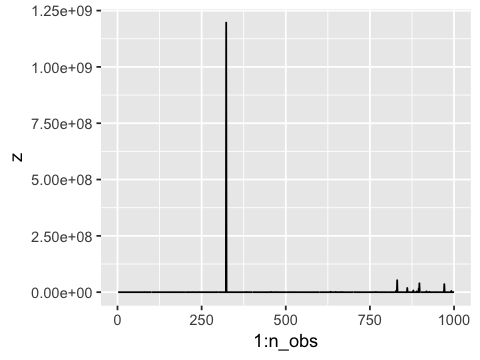

In [56]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ круцио

# И ещё одна копипаста кода 
n_obs = 10^3
z = rep(0, n_obs)  # вектор для выборочных дисперсий

for(i in 1:n_obs){
    z[i] = var(rcauchy(i))
}

qplot(1:n_obs, z, geom='line')

У распределения Коши тоже есть разные забавные свойства. Например, если у нас есть две независимые нормально распределённые случайные величины $X_1 \sim N(0,1)$ и $X_2 \sim N(0,1)$, то случайная величина $Y = \dfrac{X_1}{X_2}$ будет иметь распределение Коши. Если вы хорошо учите математическую статистку, то вы уже догадались, что распределение Стьюдента с одной степенью свободы, $t(1)$ — это ни что иное, как распределение Коши. Посмотрите в лекциях, чему равно математическое ожидание и дисперсия для распределеняи Стьюдента и попытайтесь соотнести это с тем, что было получено вами выше. А ещё [почитайте блог Дьяконова.](https://dyakonov.org/2016/03/04/тяжёлые-хвосты/) У него много крутых мыслей по разным темам, связанным с анализом данных. 

In [57]:
# Напишите свои мысли в виде связного текста! А то сниму баллы.

![](https://cs7.pikabu.ru/post_img/2017/12/25/5/1514185823137275190.jpg)